# $\textbf{Linear State Space Models}$


<a id='index-0'></a>

Recall the following formulation:

$$
\begin{align}
x_{t+1} & = Ax_t + Cw_{t+1}, \\
y_t & = Gx_t, \tag{1}\\
x_0 &\sim N(\mu_0,\Sigma_0),
\end{align}
$$

for $t=0,1,2,\dots$ and $\{w_{t}\}$ is IID with $w_{t+1} \sim N(0,I)$. 

Given $A$, $C$, $G$, and draws of $x_0$ and $\{w_{t}\}$, model (1) pins down the values of sequences $\{x_t\}$ and $\{y_t\}$.



##### $\textbf{Today's Plan}$:

1. Specify model (1) using the `LinearStateSpace` class.
2. Work through some examples. In particular, consider two cases:
    * IID versus Persistent Risk.
    
    
<a id='index-0'></a> 

In [1]:
# 1. Import the LinearStateSpace class.

#!pip install quantecon
from quantecon import LinearStateSpace

# ----------------------------------------------------------------------------------- #
# Note:
# The `!` at the beginning allows us to run shell commands from within the notebook.
# Essentially, we install the `quantecon` package via `pip` installer, and then we
# import the `LinearStateSpace` class from `quantecon`.
# ----------------------------------------------------------------------------------- #

# 2. Load other libraries.

import numpy as np
import matplotlib.pyplot as plt


In [2]:
# 3. Let's take a look at the LinearStateSpace class.

#help(LinearStateSpace)

# ---------------------------------------------------------------------------------------- #
# Note:
# Let's go through the source code:
# https://github.com/QuantEcon/QuantEcon.py/blob/main/quantecon/_lss.py
# 
# For now, we will focus on the following items in the LinearStateSpace class:
# 1. The attributes.
# 2. Two methods: moment_sequence() and simulate().
#
# ------------------
# 1. The attributes:
#    - Model primitives: A, C, G, H, mu_0, Sigma_0.
#    - Dimensions of x_t, y_t, w_t, and v_t: n, k, m, l.
#    Something to think about: How are these attributes initialized in the code
#                              when an object is created from the LinearStateSpace 
#                              class? 
#                              Hint: Try to understand what `__init__` is doing 
#                              in the source code.
#
# 2. Two methods (we will come back to some of the other methods in due time):
#    - moment_sequence(self).  
#    Something to think about: What is this code doing in the background? Why is it okay
#                              to specify an infinite loop using `while 1:`? 
# 
#    - simulate(self, ts_length=100, random_state=None):
#    Something to think about: What is going on in the source code?   
# 
# ------------------
#
# Notes: One way to distinguish methods from attributes is to know that methods are 
#        called with parentheses, while attributes are accessed without parentheses.
#       
# ---------------------------------------------------------------------------------------- #


##### $\textbf{A Simple Example}$:

Let's consider our previous example from L26.2.2.2 (univariate autoregressive processes). Specifically, let $\{y_t\}_{t=0}^{100}$ satisfies:

$$
y_{t+1} = \phi_1y_t + \phi_2y_{t-1} + \phi_3y_{t-2} + \phi_4y_{t-3} + \sigma w_{t+1} \tag{2}
$$

where $\{w_{t}\}$ is IID and standard normal. 

When we map the above equations into our state space system (1), we set:

$$
x_t =
\begin{bmatrix}
y_t \\ y_{t-1} \\ y_{t-2} \\ y_{t-3}
\end{bmatrix}
\qquad
A = 
\begin{bmatrix}
\phi_1 & \phi_2 & \phi_3 & \phi_4 \\ 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0
\end{bmatrix}
\qquad
C = 
\begin{bmatrix}
\sigma \\ 0 \\ 0 \\ 0
\end{bmatrix}
\qquad
G = 
\begin{bmatrix}
1 & 0 & 0 & 0
\end{bmatrix}.
$$

Let us set $\phi_1 = 0.5$, $\phi_2 = -0.2$, $\phi_3 = 0$, $\phi_4 = 0.5$, $\sigma = 0.2$, $y_0 = y_{-1} = y_{-2} = y_{-3} = 1$. 

Now, simulate the dynamics of (2) using LinearStateSpace.
  

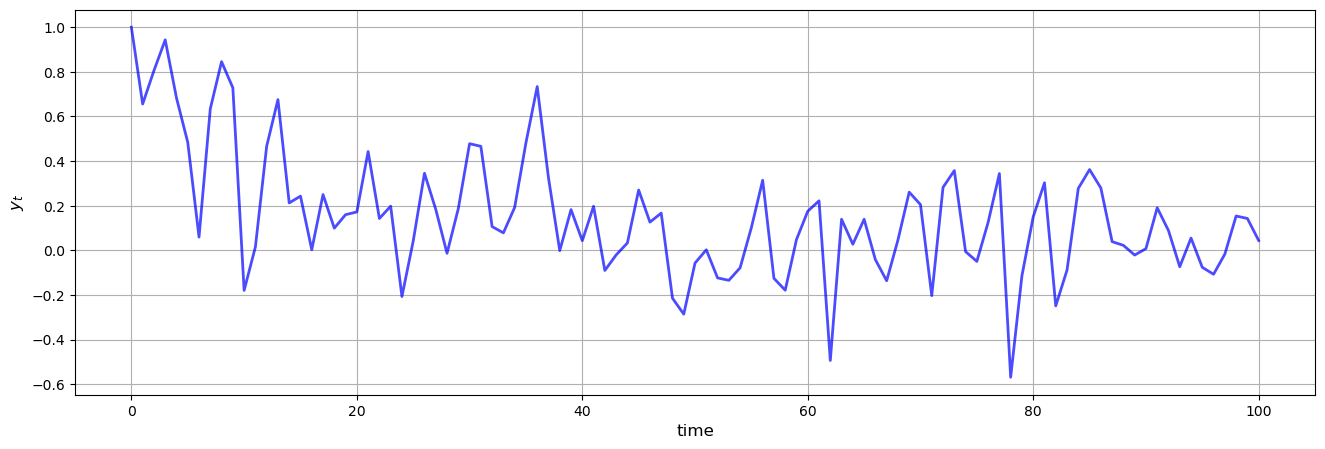

In [3]:
# 4. Define a wrapper function.

# please follow the lecture notes to write down plot_lss(A, C, G, n, ts_length). Understanding 
# the lines in this function code is helpful

# you should be able to replicate a plot similar to the below.

def plot_lss(A,C,G,n,ts_length):
    ar = LinearStateSpace(A,C,G,mu_0=np.ones(n))
    x, y = ar.simulate(ts_length,random_state=1234)
    fig, ax = plt.subplots(1,1, figsize=(16,5))
    y=y.flatten()
    ax.plot(y,'b-',lw=2,alpha=0.7)
    ax.grid()
    ax.set_xlabel('time',fontsize=12)
    ax.set_ylabel('$y_t$', fontsize=12)
    plt.show()

phi1,phi2, phi3, phi4, sigma= 0.5, -0.2, 0, 0.5, 0.2
A1=[[phi1,phi2,phi3,phi4],[1,0,0,0],[0,1,0,0],[0,0,1,0]]
C1 = [[sigma],[0],[0],[0]]
G1=[1,0,0,0]
plot_lss(A1,C1,G1,n=4, ts_length=101)

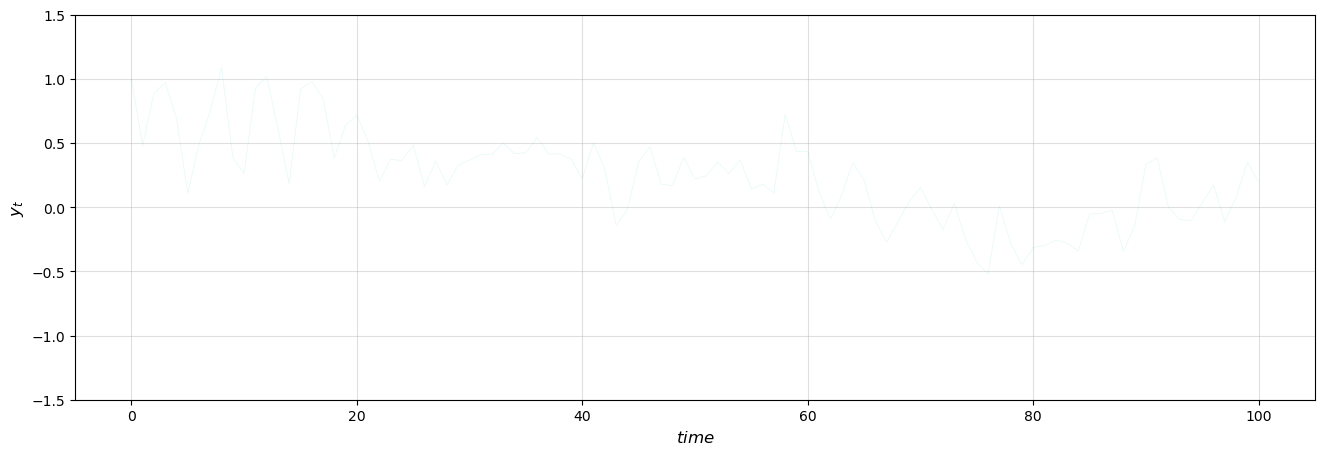

In [4]:
# 5. Cross section plots.

# please follow the lecture notes to write down a variant of the function cross_section_plot(). 
# However, for our purpose here, we do not need to plot the relative frequency graph.

# you should be able to replicate a plot similar to the below.
import random

def cross_section_plot(A,C,G,n=4,ts_length=100,sample_size=20):
    ar = LinearStateSpace(A,C,G,mu_0=np.ones(n))
    fig, ax=plt.subplots(1,1,figsize=(16,5))
    ax.grid(alpha=0.4)
    ax.set_ylim(-1.5,1.5)
    ax.set_ylabel('$y_t$', fontsize=12)
    ax.set_xlabel('$time$',fontsize=12)
    sample_y=np.zeros((sample_size,ts_length))
    for i in range(sample_size):
        rcolor=random.choice(('c','g','b','k'))
        x, y0 = ar.simulate(ts_length,random_state=None)
        y0 = y0.flatten()
        ax.plot(y0, color=rcolor, lw=0.5, alpha=0.1)
        sample_y[i,:] = y0
        
        return sample_y
y_rep = cross_section_plot(A1, C1, G1,n=4,ts_length=101, sample_size=100)

#### $\textbf{Two More Examples: IID versus Persistent Risk}$

We'll formulate a state-state space system in the usual form:


$$
\begin{aligned}
    x_{t+1} & =  A x_t + C w_{t+1},   \\
    y_t &  =  \underbrace{G}_{1\times n} \cdot \underbrace{x_t}_{n\times 1} \nonumber,
\end{aligned} 
$$

where:

$$
\begin{aligned}
    x_0 & \sim N(\mu_0, \Sigma_0), \\
    w_{t+1} & \sim N(0,I),
\end{aligned}
$$

and set some special parameters pinning down $A, C, G, \mu_0, \Sigma_0$.

<a id='index-0'></a>   

**Example I:** (Persistent risk)
  
Set $n=1$ and $A =1, C=0, G =1, \sigma > 0$.
  
Set $\mu_0 = 0, \Sigma_0 = \sigma^2 > 0 $. 
  
   * please compute and plot the unconditional moments $\mu_t$ and $\Sigma_t$ of $x_t$ for $ t=0, 1, \ldots, 100$. 
     
   * please compute and plot the unconditional moments of $y_t$ for $ t=0, 1, \ldots, 100$. 
     
   * please simulate $N$ paths of $\{y_t\}_{t=0}^{100}$.
     
   * please take the **ensemble** formed by those $N$ paths, compute and plot **cross-section** means and variances of $y_t$ across paths.
     
   * please select **one** and only one path $\{y_t\}_{t=0}^{100}$ from the ensemble of $N$ paths and for that **one** path compute its  sample mean and variance using the formulas $ \bar y = 101^{-1} \sum_{t=0}^{100} y_t$ and $ \hat \sigma^2 = 100^{-1} \sum_{t=0}^{100} ( y_t - \bar y)^2$. (Please note that you can compute these easily using **numpy.mean** and **numpy.var**)
        
   * please compare the sample mean and variance that you computed with the associated values of the population moments that you computed earlier.  Discuss.
     


/var/folders/y5/98bzpjp15s1gwld_6_9j2hy00000gn/T/ipykernel_1376/4024751862.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  result_list=[list(map(float, next(moments))) for i in range(T)]


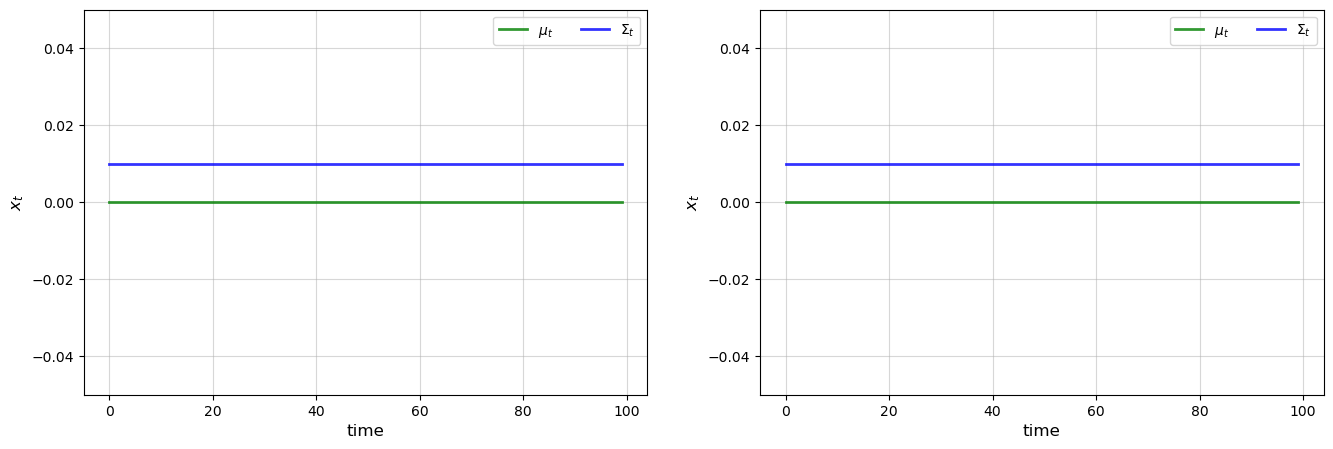

In [5]:
# Compute and plot the unconditional moments of x_t.
from collections import namedtuple
T=100
#economy= namedtuple('economy',['c','p'])
#econ1 = economy(c=3,p=3)
#print(econ1)
#econ1.c

PROFTOM=namedtuple('PROFTOM',['A','C','G','mu_0','Sigma_0'])
per_exp1= PROFTOM(A=1,C=0,G=1,mu_0=0,Sigma_0=0.1**2)
mdl_exp1=LinearStateSpace(**per_exp1._asdict())
moments= mdl_exp1.moment_sequence()
result_list=[list(map(float, next(moments))) for i in range(T)]
mu_x, mu_y, Sigma_x, Sigma_y=zip(*result_list)

fig,ax = plt.subplots(1,2, figsize = (16,5))
 
ax[0].plot(mu_x, color = "g", lw = 2,alpha = 0.8, label = '$\mu_t$')
ax[0].plot(Sigma_x, color = "b", lw = 2,alpha = 0.8, label = '$\Sigma_t$')
ax[0].set_ylim(-0.05,0.05)
ax[0].set_xlabel('time', fontsize = 12)
ax[0].set_ylabel('$x_t$', fontsize = 12)
ax[0].legend(ncol = 2)
ax[0].grid(alpha = 0.5)
 
ax[1].plot(mu_y, color = "g", lw = 2,alpha = 0.8, label = '$\mu_t$')
ax[1].plot(Sigma_y, color = "b", lw = 2,alpha = 0.8, label = '$\Sigma_t$')
ax[1].set_ylim(-0.05,0.05)
ax[1].set_xlabel('time', fontsize = 12)
ax[1].set_ylabel('$x_t$', fontsize = 12)
ax[1].legend(ncol = 2)
ax[1].grid(alpha = 0.5)

/var/folders/y5/98bzpjp15s1gwld_6_9j2hy00000gn/T/ipykernel_1376/1272435408.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mu_x.append(float(m_x))
/var/folders/y5/98bzpjp15s1gwld_6_9j2hy00000gn/T/ipykernel_1376/1272435408.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mu_y.append(float(m_y))
/var/folders/y5/98bzpjp15s1gwld_6_9j2hy00000gn/T/ipykernel_1376/1272435408.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Sigma_y.append(float(S_y))
/var/folde

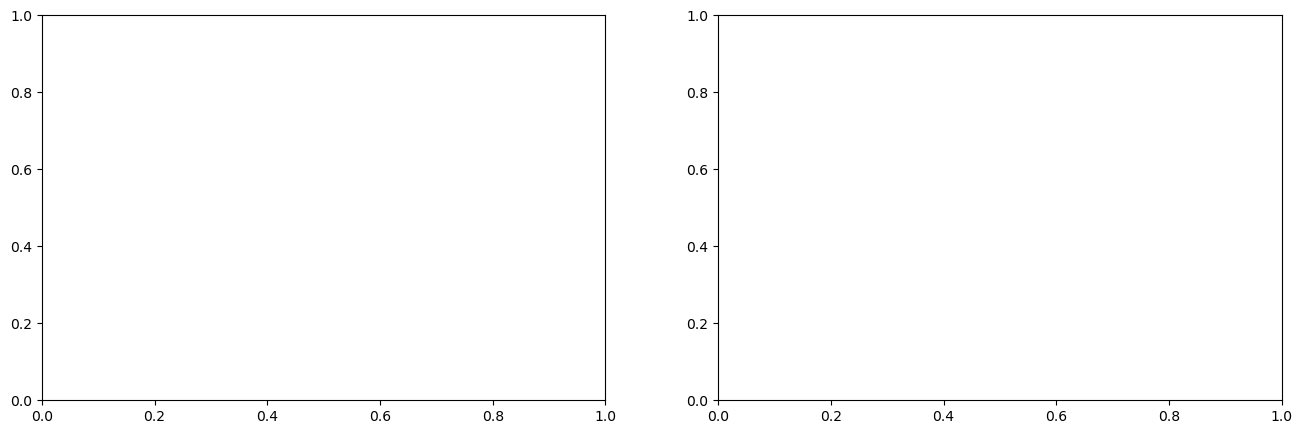

In [6]:
# Compute and plot the unconditional moments of y_t.

# Compute and plot the unconditional moments of x_t.
 
A0,C0,G0,sigma0,T,N = 1,0.1,1,0.01,20,20
 
ar0 = LinearStateSpace(A0,C0,G0,mu_0 = 0, Sigma_0 = 0.01)#sigma0 ** 2)
 
mmo = ar0.moment_sequence()
 
mu_x = []
mu_y = []
Sigma_x = []
Sigma_y = []
 
for _ in range(T):
    m_x, m_y, S_x, S_y = next(mmo)
    mu_x.append(float(m_x))
    mu_y.append(float(m_y))
    Sigma_y.append(float(S_y))
    Sigma_x.append(float(S_x))
 
# print(mu_x)
   
fig,ax = plt.subplots(1,2, figsize = (16,5))
 


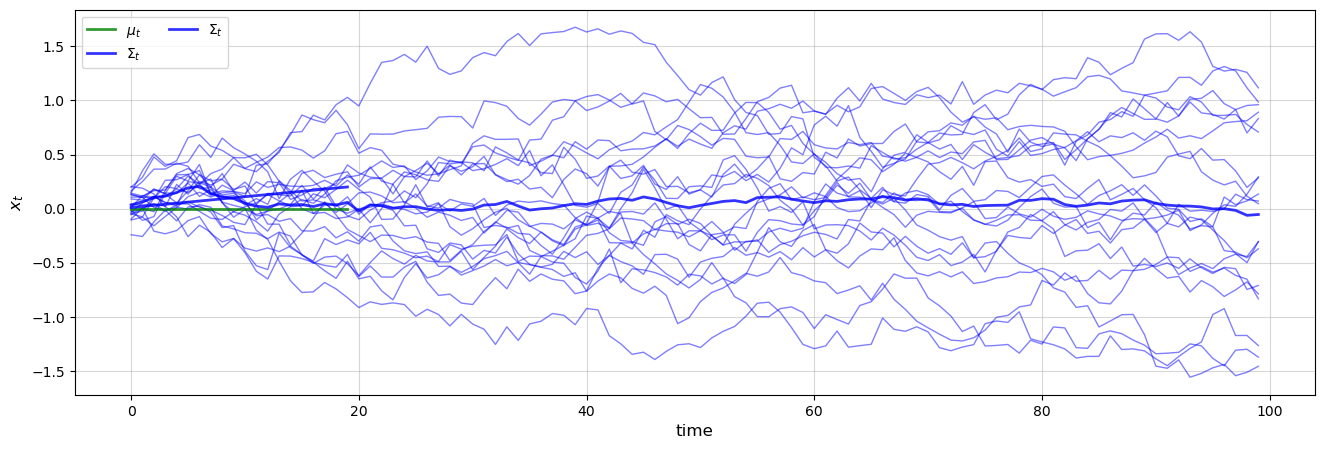

In [8]:
# Simulate N paths of {y_t}. Set N = 20, 50, 100.
A0 = 1
C0 = 0.1
G0 = 1
sigma0 = 0.01
T = 100
N = 20

sample_y = np.zeros((N,T))
ensemb_m = np.zeros(T)

fig1, ax1 = plt.subplots(1,1,figsize=(16,5))
for i in range(N):
    x0, y0 = ar0.simulate(ts_length=T)
    y0     = y0.flatten()
    ax1.plot(y0, color = 'b',lw=1, alpha=0.5)
    sample_y[i,:] = y0
    ensemb_m = ensemb_m + y0

ensemb_mm = ensemb_m/N

ax1.plot(mu_x, color = "g", lw = 2,alpha = 0.8, label = '$\mu_t$')
ax1.plot(ensemb_mm, color = "b", lw = 2,alpha = 0.8, label = '$\Sigma_t$')
ax1.plot(Sigma_y, color = "b", lw = 2,alpha = 0.8, label = '$\Sigma_t$')
#ax1.set_ylim(-1,1)
ax1.set_xlabel('time', fontsize = 12)
ax1.set_ylabel('$x_t$', fontsize = 12)
ax1.legend(ncol = 2)
ax1.grid(alpha = 0.5)


In [ ]:
# Compute the cross-section means and variances of y_t.



In [ ]:
# Select one and only one path of {y_t}. Compute sample mean and variance. 



In [ ]:
# Compare the same means and variances to the population moments. Discuss. 



**Example II:** (IID risk)

Set $n=1$ and $A =0, C=\sigma, G =1 , \mu_0 = 1, \Sigma_0  = C C'$. 
  
  * please compute and plot the unconditional moments $\mu_t$ and $\Sigma_t$ of $x_t$ for $ t=0, 1, \ldots, 100$. 
     
  * please compute and plot the unconditional moments of $y_t$ for $ t=0, 1, \ldots, 100$. 
     
  * please simulate $N$ paths of $\{y_t\}_{t=0}^{100}$.
     
   * please take the **ensemble** formed by those $N$ paths, compute and plot **cross-section** means and variances of $y_t$ across paths.
     
   * please select **one** and only one path $\{y_t\}_{t=0}^{100}$ from the ensemble of $N$ paths and for that **one** path compute its  sample mean and variance using the formulas
     $ \bar y = 101^{-1} \sum_{t=0}^{100} y_t$ and $\hat{\sigma}^2 = 100^{-1} \sum_{t=0}^{100}(y_t-\bar y)^2$. (Please note that you can compute these easily using **numpy.mean** and **numpy.var**)
    
   * please compare the sample mean and variance that you computed with the associated values of the population moments that you computed earlier. Discuss.


In [ ]:
# Compute and plot the unconditional moments of x_t.



In [ ]:
# Compute and plot the unconditional moments of y_t.



In [ ]:
# Simulate N paths of {y_t}. Set N = 20, 50, 100.



In [ ]:
# Compute the cross-section means and variances of y_t.



In [ ]:
# Select one and only one path of {y_t}. Compute sample mean and variance. 



In [ ]:
# Compare the same means and variances to the population moments. Discuss. 

